In [119]:
import os
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import pandas as pd
%load_ext autoreload
%autoreload 2
import pickle

from DLC_for_WBFM.utils.feature_detection.utils_keypoint_matching import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:
which_suffix = 'prealigned'

fname = f'clust_df_dat_{which_suffix}.pickle'
with open(fname, 'rb') as f:
    clust_df = pickle.load(f)
    
fname = f'frame_dat_{which_suffix}.pickle'
with open(fname, 'rb') as f:
    all_frames = pickle.load(f)

## Do everything in 100 frame chunks

In [66]:
all_window_matches = []
all_starts = list(range(0,401,50))
window_length = 99

In [69]:
for start in all_starts:
    kp_df, tracklet_df = separate_keypoints_and_tracklets(clust_df, start, window_length)
    all_tracklet_features = calc_all_tracklet_features(kp_df, tracklet_df, start, window_length)
    all_matches, _ = match_tracklets_using_features(all_tracklet_features, tracklet_df=tracklet_df)
    all_window_matches.append(all_matches)

  1%|▌                                                                                 | 7/1092 [00:00<00:20, 52.11it/s]

Calculating features for all tracklets


  0%|                                                                                  | 1/1024 [00:00<02:32,  6.69it/s]

Calculating features for all tracklets


  0%|                                                                                   | 1/899 [00:00<01:33,  9.62it/s]

Calculating features for all tracklets


  0%|                                                                                           | 0/798 [00:00<?, ?it/s]

Calculating features for all tracklets


  0%|                                                                                   | 1/789 [00:00<02:32,  5.15it/s]

Calculating features for all tracklets


  0%|                                                                                   | 1/776 [00:00<02:11,  5.91it/s]

Calculating features for all tracklets


  0%|▏                                                                                  | 2/779 [00:00<00:45, 17.24it/s]

Calculating features for all tracklets


  0%|                                                                                   | 1/729 [00:00<01:24,  8.62it/s]

Calculating features for all tracklets


  0%|                                                                                           | 0/695 [00:00<?, ?it/s]

Calculating features for all tracklets


100%|█████████████████████████████████████████████████████████████████████████████████| 695/695 [03:32<00:00,  3.27it/s]


In [93]:
# Convert the local matches to the indices of the global dataframe
global_matches = {}
for start, this_match in zip(all_starts, all_window_matches):
    kp_df, tracklet_df = separate_keypoints_and_tracklets(clust_df, start, window_length)
    for k, val in this_match.items():
        i0, i1 = tracklet_df['clust_ind'].iloc[list(k)]
        if i1 > i0:
            global_matches[(i0, i1)] = val

In [200]:
stitched_df = consolidate_tracklets(clust_df, global_matches.keys(), verbose=1)


Extended and dropped 771/5835 rows


In [202]:
# Did the consolidation function actually work?
k = list(global_matches.keys())[1]
print(k)
print("Original track0: ", clust_df['slice_ind'].iloc[k[0]])
print("Original track1: ",clust_df['slice_ind'].iloc[k[1]])
print("Stitched track: ",stitched_df['slice_ind'].iloc[k[0]])

(3, 907)
Original track0:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Original track1:  [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Stitched track:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


In [211]:
which_suffix = 'prealigned-stitched100'

fname = f'clust_df_dat_{which_suffix}.pickle'
with open(fname, 'wb') as f:
    pickle.dump(stitched_df, f)

# Do once more

In [208]:
all_window_matches = []
all_starts = list(range(0,301,50))
window_length = 199

In [ ]:
for start in all_starts:
    kp_df, tracklet_df = separate_keypoints_and_tracklets(stitched_df, start, window_length)
    all_tracklet_features = calc_all_tracklet_features(kp_df, tracklet_df, start, window_length)
    all_matches, _ = match_tracklets_using_features(all_tracklet_features, tracklet_df=tracklet_df)
    all_window_matches.append(all_matches)

# Convert the local matches to the indices of the global dataframe
global_matches = {}
for start, this_match in zip(all_starts, all_window_matches):
    kp_df, tracklet_df = separate_keypoints_and_tracklets(stitched_df, start, window_length)
    for k, val in this_match.items():
        i0, i1 = tracklet_df['clust_ind'].iloc[list(k)]
        global_matches[(i0, i1)] = val

  0%|                                                                                  | 1/1633 [00:00<02:43,  9.97it/s]

Warning, few keypoints (7) detected
Calculating features for all tracklets


  0%|                                                                                  | 1/1448 [00:00<03:42,  6.50it/s]

Calculating features for all tracklets


  0%|                                                                                          | 0/1315 [00:00<?, ?it/s]

Calculating features for all tracklets


 12%|█████████▊                                                                      | 161/1315 [06:17<20:06,  1.05s/it]

In [ ]:
stitched_df2 = consolidate_tracklets(stitched_df, global_matches.keys(), verbose=1)


In [204]:
# match = list(global_matches.keys())[1]
# ind = [list(stitched_df['clust_ind']).index(match[0]), list(stitched_df['clust_ind']).index(match[1])]
# print(ind[0], stitched_df['slice_ind'][ind[0]])
# print(ind[1], stitched_df['slice_ind'][ind[1]])

# Compare stitched with pre-stitched

In [205]:
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import hist_of_tracklet_lens

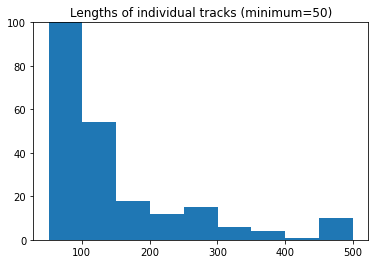

In [206]:
hist_of_tracklet_lens(clust_df)

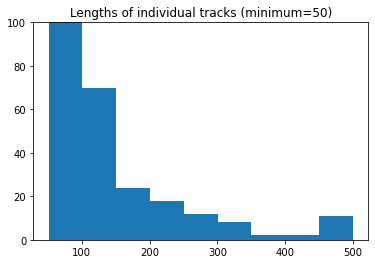

In [207]:
hist_of_tracklet_lens(stitched_df)

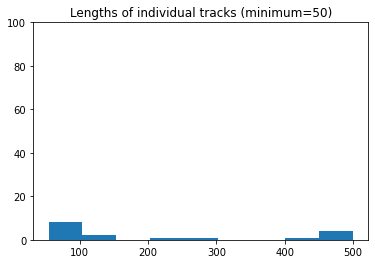

In [210]:
hist_of_tracklet_lens(stitched_df2)

In [ ]:
from collections import defaultdict
all_num_tracks = defaultdict(int)
min_len = 20
window_len = 20
# for row in clust_df['slice_ind']:
#     if len(row) < min_len:
#         continue
#     for ind in row:
#         if row[0]<:
#             break
#         all_num_tracks[ind] += 1

num_frames = 500
num_windows = num_frames - window_len
all_num = np.zeros(num_frames)
for k, val in all_num_tracks.items():
    all_num[k] = val